In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [ ]:
data.drop('Serial No.', axis=1, inplace=True)

In [9]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [11]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Text(0.5, 1.0, 'Correlation Heat Map')

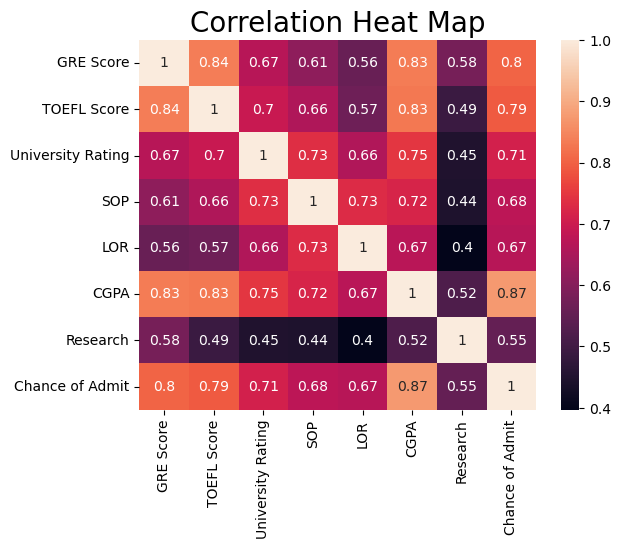

In [14]:
sns.heatmap(data.corr(), annot=True).set_title('Correlation Heat Map', color='black', size='20')

In [15]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [17]:
correlation=data.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [20]:
x = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [21]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [22]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [23]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
model.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

In [25]:
model.intercept_

-1.2594324782480208

In [27]:
model.predict([[326,106,3,3.5,4.0,8.92,1]])

C:\Program Files\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.79689826])

In [28]:
y_pred=model.predict(x)

In [29]:
y_pred

array([0.95145856, 0.80563668, 0.65473672, 0.73836237, 0.63520644,
       0.86585369, 0.71298611, 0.60111955, 0.54721429, 0.71258632,
       0.73331233, 0.83798935, 0.85454028, 0.63921616, 0.63465527,
       0.64133249, 0.70948364, 0.65130637, 0.73187372, 0.64842668,
       0.61112216, 0.69480683, 0.92738243, 0.95917695, 0.95549776,
       0.96227964, 0.75686109, 0.52336409, 0.42480122, 0.48764304,
       0.60150182, 0.7144819 , 0.92841887, 0.9352382 , 0.95990336,
       0.86028384, 0.65624528, 0.54319204, 0.49667295, 0.58154955,
       0.64552574, 0.65502698, 0.68015917, 0.83873356, 0.88255438,
       0.82951159, 0.90279796, 0.93381492, 0.81391688, 0.75875428,
       0.69169457, 0.62345591, 0.71227997, 0.68394493, 0.65815354,
       0.58738328, 0.54513739, 0.49421302, 0.42464989, 0.62126521,
       0.60137214, 0.61512233, 0.64370202, 0.70102937, 0.74954297,
       0.7826933 , 0.78866058, 0.73224745, 0.82743953, 0.85760623,
       0.95682275, 0.96052767, 0.89467569, 0.7985727 , 0.77315

In [30]:
pd.DataFrame({'True values': y, 'Predicted values':y_pred})

,True values,Predicted values
0,0.92,0.951459
1,0.76,0.805637
2,0.72,0.654737
3,0.80,0.738362
4,0.65,0.635206
...,...,...
395,0.82,0.808198
396,0.84,0.811155
397,0.91,0.908017
398,0.67,0.722639


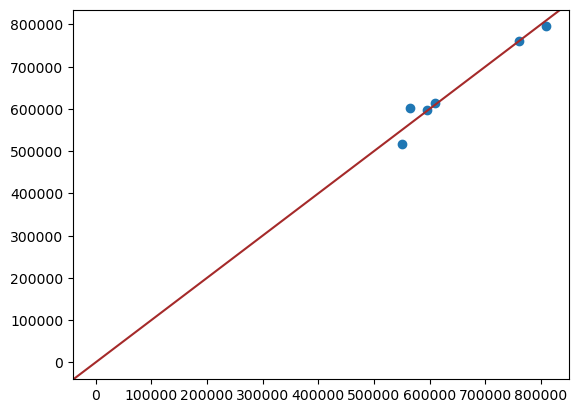

In [31]:
plt.axline([0,0],[1,1],c= 'brown')
plt.scatter(y,y_pred)

In [32]:
model.score(x,y) 

0.8034713719824393

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y,y_pred)

0.003986893243246914